**CÓDIGO 1: Ecuación de Schrodinger Independiente del Tiempo en 1D, Diferencias Finitas: Pozo Infinito.**

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

-Construcción del potencial

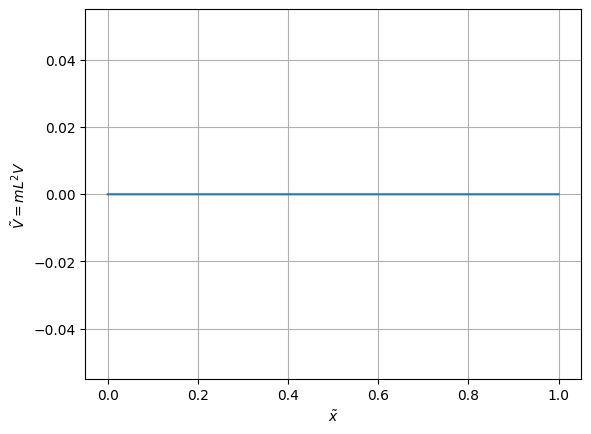

In [183]:
#Definimos el número de puntos de discretización N y el paso h.

N=2000
h=1/N

#Definimos el vector que discretiza el dominio [0,1]

x=np.linspace(0,1,N+1)

#Definimos el potencial Vtilda=mL^2V

def Vtilda(x):
    return 0*x

#Graficamos el potencial

V=Vtilda(x)
plt.plot(x,V)
plt.xlabel(r'$\tilde{x}$')                    
plt.ylabel(r'$\tilde{V}=mL^2V$')   
plt.grid(True)

-Construcción de la matriz hamiltoniana y cálculo de autovectores y autovalores.

In [184]:
#Definimos la diagonal principal sin incluir el primer y último elemento
#[1:-1] toma todos los elementos de Vtilda menos el primero y el último

d=1/h**2+Vtilda(x)[1:-1]

#Definimos la diagonal superior e inferior

e=-1/(2*h**2)*np.ones(len(d)-1)

#Calculamos los autovalores almacenados en  w y los autovectores en v por columnas

w,v=eigh_tridiagonal(d,e) #eigh_tridiagonal permite calcular autovalores y autovectores de una matriz tridiagonal sin necesidad de construirla

-Gráfica de las funciones de onda y densidades de probabilidad

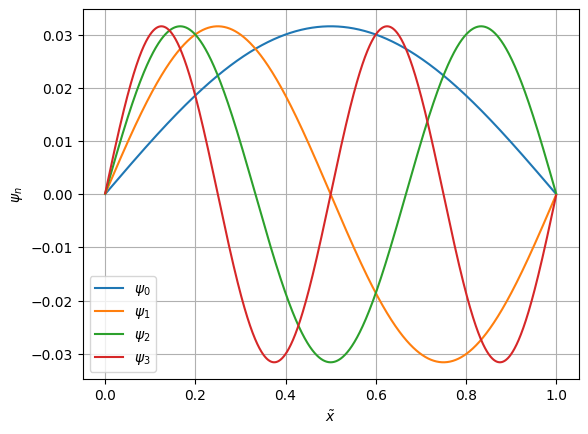

In [185]:
#Mostramos las primeras cuatro autofunciones

plt.plot(x[1:-1],v.T[0],label=r'$\psi_0$')
plt.plot(x[1:-1],v.T[1],label=r'$\psi_1$')
plt.plot(x[1:-1],v.T[2],label=r'$\psi_2$')
plt.plot(x[1:-1],v.T[3],label=r'$\psi_3$')
plt.legend()
plt.xlabel(r'$\tilde{x}$')                    
plt.ylabel(r'$\psi_n$') 
plt.grid(True)

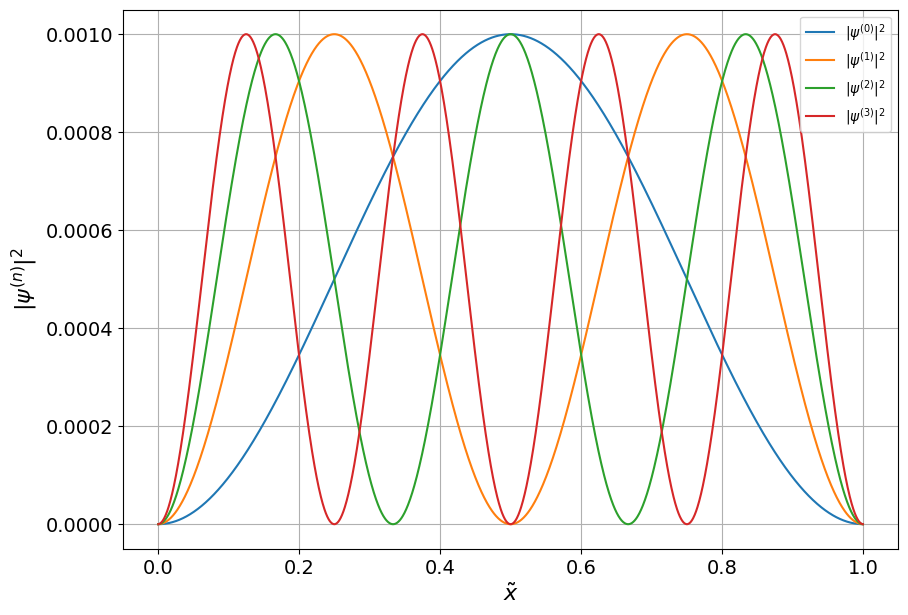

In [ ]:
plt.figure(figsize=(10, 7))

for n in range(4):  # los cuatro primeros estados
    plt.plot(x[1:-1], v.T[n]**2, label=fr"$|\psi^{{({n})}}|^2$")

plt.legend(loc='upper right')
plt.xlabel(r'$\tilde{x}$', fontsize=16)                    
plt.ylabel(r'$|\psi^{(n)}|^2$', fontsize=16) 
plt.xticks(fontsize=14)   # números eje X
plt.yticks(fontsize=14)    
plt.grid(True)
plt.show()


SOLUCIONES ANALÍTICAS:

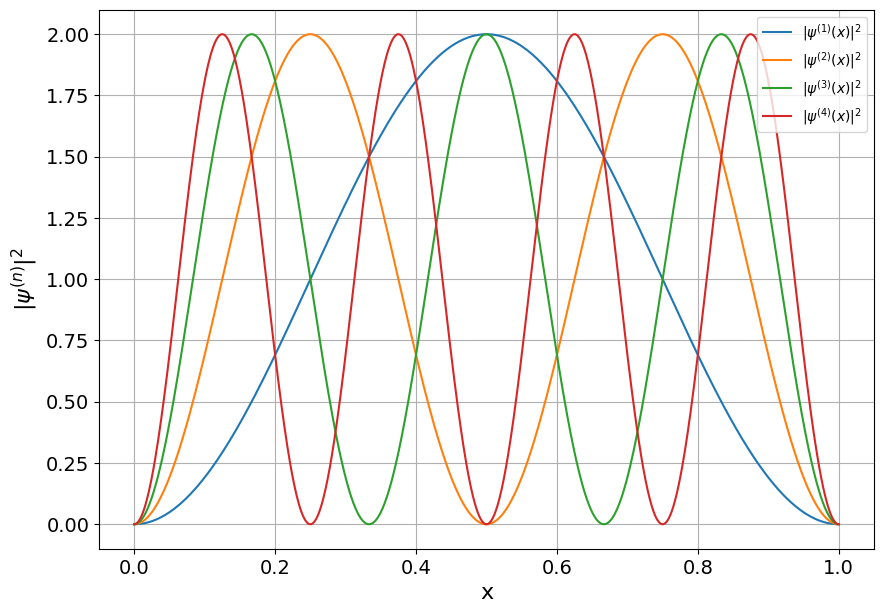

In [187]:
L=1.0
x = np.linspace(0, L, 1000)

def psi(n, x, L):
    return np.sqrt(2/L) * np.sin(n * np.pi * x / L)

def rho(n, x, L):
    return psi(n, x, L)**2

# Valores de n a graficar
n_values = [1, 2, 3, 4]

plt.figure(figsize=(10, 7))

for n in n_values:
    plt.plot(x, rho(n, x, L), label = fr"$|\psi^{{({n})}}(x)|^2$")


plt.xlabel("x", fontsize=16)
plt.ylabel(r"$|\psi^{(n)}|^2$", fontsize=16)
plt.xticks(fontsize=14)                   # números eje X
plt.yticks(fontsize=14)    
plt.legend()
plt.grid(True)
plt.show()


-Cálculo de los autovalores/energías propias

E_0 = 4.934801
E_1 = 19.739193
E_2 = 44.413138
E_3 = 78.956575
E_4 = 123.369421
E_5 = 177.651564
E_6 = 241.802872
E_7 = 315.823185
E_8 = 399.712321
E_9 = 493.470073


Text(0, 0.5, '$mL^2E/\\hbar^2$')

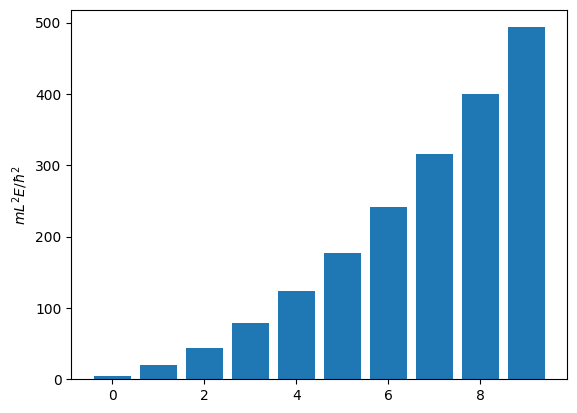

In [188]:
#Mostramos los primeros 10 autovalores
for i in range(10):
    print(f'E_{i} = {w[i]:.6f}')

plt.bar(np.arange(0,10,1),w[0:10])
plt.ylabel(r'$mL^2E/\hbar^2$') #Realmente estamos obteniendo Etilda=mL^2E y se debe dividir por hbar^2 para que tenga sentido dimensionalmente

E_1 = 0.3760 eV
E_2 = 1.5041 eV
E_3 = 3.3843 eV
E_4 = 6.0165 eV
E_5 = 9.4007 eV
E_6 = 13.5370 eV
E_7 = 18.4253 eV
E_8 = 24.0656 eV
E_9 = 30.4579 eV


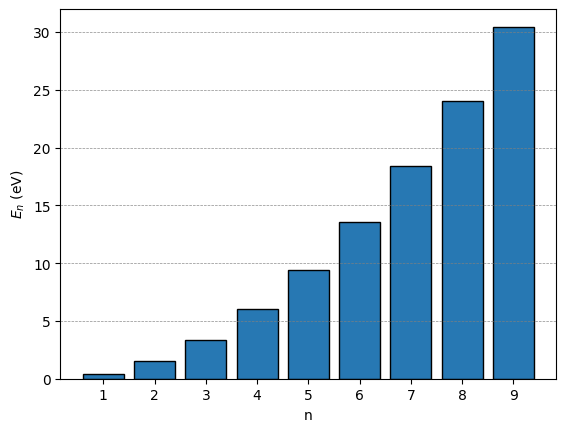

In [ ]:
# Constantes físicas
hbar = 1.054_571_817e-34  # J·s
eV   = 1.602_176_634e-19  # J/eV

# Parámetros físicos
m      = 9.109_383_7015e-31  # kg (masa del electrón)
L_phys = 1e-9                # m (1 nm de ancho de pozo)

# Conversión de autovalores adimensionales a reales
#   w = (m L^2 / ħ^2) * E   ⇒   E = (ħ^2 / m L^2) * w
E_J  = (hbar**2) * w / (m * L_phys**2)  # en Joule
E_eV = E_J / eV                         # en eV

n = np.arange(1, 10)
# Mostrar los primeros 10 autovalores
for i in range(9):
    print(f'E_{i+1} = {E_eV[i]:.4f} eV')

# Graficar en mismo estilo que tu código original
plt.bar(n, E_eV[:9], color="#2778b3", edgecolor="black")
plt.ylabel(r'$E_n$ (eV)')
plt.xlabel("n")
plt.xticks(n)  # ticks de 1 en 1, empezando en 1
plt.grid(True, which="both", axis="y", linestyle="--", linewidth=0.5, color="gray", alpha=0.9)
plt.show()



SOLUCIONES ANALÍTICAS:


n=1: 0.3760 eV
n=2: 1.5041 eV
n=3: 3.3843 eV
n=4: 6.0165 eV
n=5: 9.4008 eV
n=6: 13.5371 eV
n=7: 18.4255 eV
n=8: 24.0659 eV
n=9: 30.4584 eV


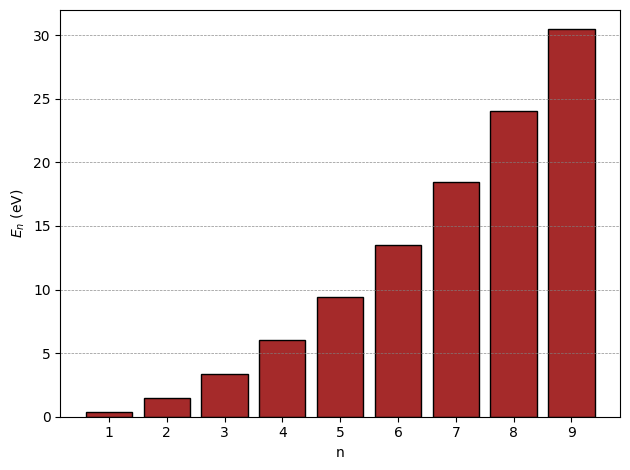

In [190]:

# Constantes físicas
hbar = 1.054_571_817e-34  # J·s
m_e  = 9.109_383_7015e-31 # kg (masa del electrón)
eV   = 1.602_176_634e-19  # 1 eV en Joule

# Parámetro del pozo
L = 1e-9  # ancho del pozo en metros (1 nm)

# n = 1..9
n = np.arange(1, 10)

# Energías en julios (analíticas)
E = (n**2) * (np.pi**2) * (hbar**2) / (2 * m_e * L**2)

# Energías en eV
E_eV = E / eV

# Mostrar los primeros 9 autovalores
for i, val in enumerate(E_eV, start=0):
    print(f"n={i+1}: {val:.4f} eV")

# Gráfico de barras con el mismo estilo que tu otro código
plt.bar(n, E_eV, color="brown", edgecolor="black")
plt.ylabel(r'$E_n$ (eV)')
plt.xlabel("n")
plt.xticks(n)
plt.grid(True, which="both", axis="y", linestyle="--", linewidth=0.5, color="gray", alpha=0.9)
plt.tight_layout()
plt.show()
